# Лабораторная работа №5

>Вариант: 9
> [Датасет про оценки студентов](https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation)

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, ceil, log2
import random
from itertools import combinations
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Для начала загрузим датасет и выведем его

In [2]:
file_id = "1jJXyWImTiuWwRhuDseAS9YW8O2qvnyD5"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


Рассчитаем основные статистические показатели по данным

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [4]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


Удалим неинформативную колонку `STUDENT ID`

In [5]:
df = df.drop('STUDENT ID', axis=1)

Выведем гистограммы признаков

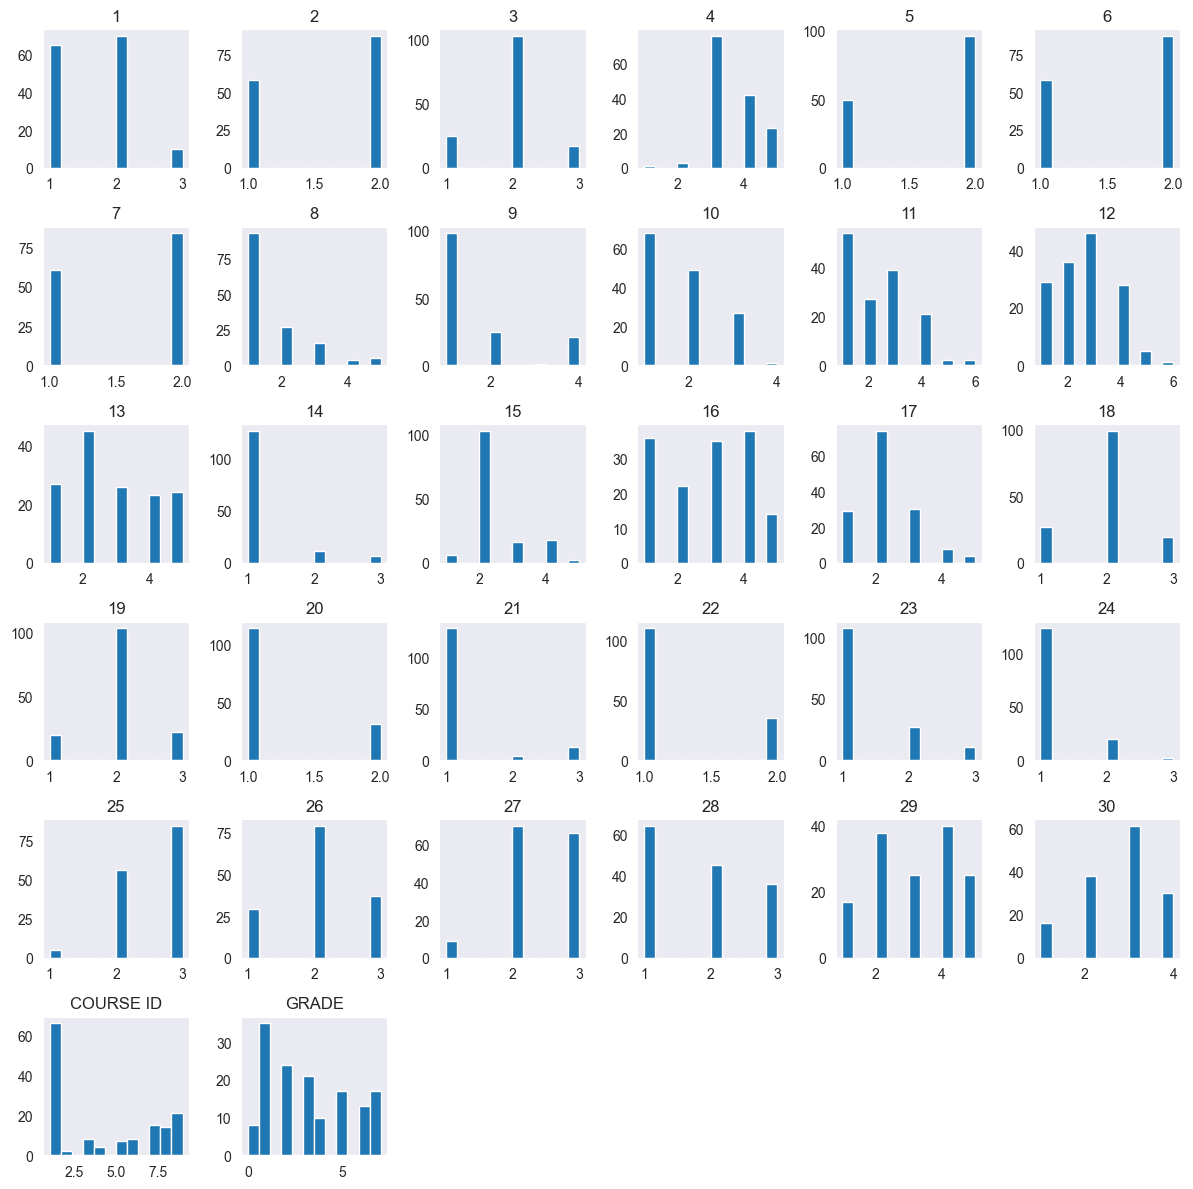

In [6]:
ax = df.hist(bins=12, figsize=(12, 12))
for axis in ax.flatten():
    axis.grid(False)
plt.tight_layout()

Введём метрику для определения успеваемости студента.

Будем считать что студент успешный если его оценка больше или равно 4

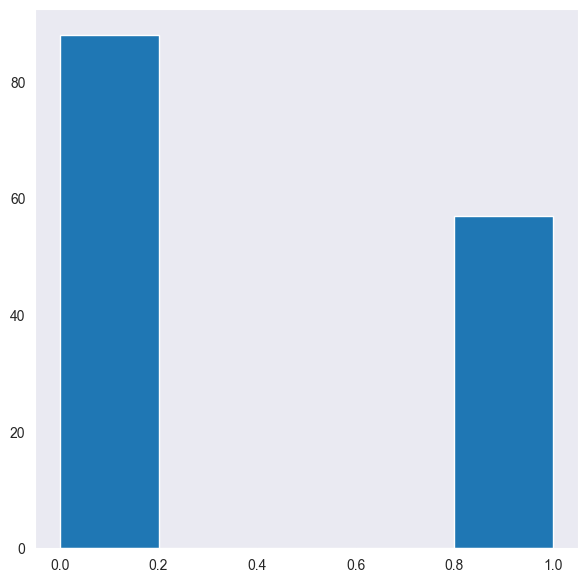

In [7]:
y = pd.Series([1 if i >= 4 else 0 for i in df['GRADE']])
ax = y.hist(bins=5, figsize=(7, 7))
ax.grid(False)

Отберём случайным образом $\sqrt n$ признаков

In [8]:
np.random.seed(145)

X = df.drop('GRADE', axis=1)
columns = X.columns
columns = np.random.choice(columns, ceil(sqrt(len(columns))), replace=False)
X = X[columns]
X.head()

,15,4,5,13,3,20
0,2,3,1,3,3,1
1,2,3,1,2,3,1
2,2,3,2,2,2,1
3,2,3,1,5,1,1
4,2,3,2,2,1,1


Разделим данные а обучающую и тестовую выборки

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Реализуем дерево решений

Начнём с определения класса узла дерева

In [10]:
class Node:
  def __init__(self, value, proba, is_leaf, feature=None, children=None):
    self.feature = feature                 # индекс признака для разбиения
    self.children = children               # словарь: {значение признака -> узел}
    self.value = value                     # предсказанное значение
    self.proba = proba                     # вероятность класса 1
    self.is_leaf = is_leaf                 # флаг листа

Теперь введём вспомогательную функцию для рекурсивного выполнения предсказания класс и вероятности

In [11]:
def pred_node(node, x):
  # Если это лист или такого варианта признака нет
  # то просто вернём значение
  if node.is_leaf or x[node.feature] not in node.children:
    return node.value, node.proba

  feature_value = x[node.feature]
  # Иначе рекурсивно вызываем предсказание для дочернего узла
  return pred_node(node.children[feature_value], x)

Теперь введём функии которые позволят построить дерево решений

Начнём с функции вычисления энтропии

Для бинарной классификации формула будет следующей:

$$
H(S) = -[P(0) \cdot \log(P(0)) + P(1) \cdot \log(P(1))]
$$

где

- $P(0)$ - вероятность принадлежности классу `0`

- $P(1)$ - вероятность принадлежности классу `1`

Значение энтропии меняется в промежутке от 0 до 1. Если значение равно нулю то множество содержит только объекты одного класса, а если 1 то значения случайны

In [12]:
def calculate_entropy(y):
  if len(y) == 0:
      return 0.0

  count_0 = (y == 0).sum()
  count_1 = (y == 1).sum()
  total = len(y)

  p0 = count_0 / total
  p1 = count_1 / total

  entropy = 0.0
  if p0 > 0:
      entropy -= p0 * log2(p0)
  if p1 > 0:
      entropy -= p1 * log2(p1)

  return entropy

Для того чтобы определять наилучшее разбиение на очередном шаге построения дерева необходимо уметь считать информационный выигрыш.

Он рассчитывается путём вычитания энтропии каждой ветви от ветви исходной энтропии.

Формула имеет вид:

$$
\text{Gain}(S,A)=H(S) - \sum\frac{|S_v|}{|S|}H(S_v)
$$

где

- $H(S)$ - энтропия

- $A$ - признак (колонка в $X$)

- $S$ - множество значений признаков (строка в $X$)

- $V$ - возможные значения признака $A$

- $S_v$ - подмножество объектов у которых $A = v$

Напишем соотвествующую функцию:

In [13]:
def calculate_information_gain(x, y, column):
  full_entropy = calculate_entropy(y)   # H(S)
  weighted_entropy = 0.0

  unique_values = x[column].unique()      # V, причём A это column

  for value in unique_values:
    subset_y = y[x[column] == value]      # S_v
    subset_entropy = calculate_entropy(subset_y)
    weighted_entropy += (len(subset_y) / len(y)) * subset_entropy

  information_gain = full_entropy - weighted_entropy
  return information_gain

Теперь введём основную функцию, которая будет выполнять построение дерева решений

In [14]:
def build_node(x, y, columns,
               max_depth, depth):

  # Рассчитаем значением по умолчанию на случай если не удастся найти соотвествующий признак
  # во время предсказания
  count_1 = (y == 1).sum()
  total = len(y)
  proba = count_1 / total
  value = 1 if count_1 >= total - count_1 else 0

  # Если глубина больше максимальной или число объектов меньше минимального то останавливаемся
  if depth >= max_depth or len(np.unique(y)) == 1:
    return Node(value=value, proba=proba, is_leaf=True)

  # Ищем признак с лучшим разбиением
  max_gain = -1
  max_gain_column = None

  for column in columns:
    gain = calculate_information_gain(x, y, column)
    if gain > max_gain:
      max_gain = gain
      max_gain_column = column

  # Если разделить не удается, возвращаем лист с самым частым классом
  if max_gain_column is None or max_gain <= 0:
    return Node(value=value, proba=proba, is_leaf=True)

  # Иначе инициализируем список детей по принакам
  children = {}
  features = x[max_gain_column].unique()
  for feature in features:
    subset_x = x[x[max_gain_column] == feature]
    subset_y = y[x[max_gain_column] == feature]
    children[feature] = build_node(subset_x, subset_y, columns, max_depth, depth + 1)

  return Node(value=value, proba=proba, is_leaf=False, feature=max_gain_column, children=children)

Наконец определим стандартные методы `fit`, `predict` и `predict_proba`

In [15]:
def fit(x, y, columns, max_depth = 10000):
    root = build_node(x[columns], y, columns, max_depth, depth=0)
    return root

In [16]:
def predict(root, x, columns):
  results = [pred_node(root, i) for i in x[columns].to_records()]
  classes, probabilities = zip(*results)
  return np.array(classes), np.array(probabilities)

Теперь, когда модель готова определим функции для рассчёта необходимых метрик

Метрика `accuracy`

Показывает какая доля предсказанных значений совпала с реальными

In [17]:
def accuracy_score(y_true, y_pred):
  return float(np.mean(y_true == y_pred))

Метрики `precision` и `recall`

- `precision` - какую долю составляю `true_positive` от всех ПРЕДСКАЗАННЫХ `positive`

$$
Precision = \frac{TP}{TP + FP} = \frac{\text{Correct positives}}{\text{All predicted positives}}
$$

- `recall` - какую долю составляют `true_positive` от всех РЕАЛЬНЫХ `positive`

$$
Recall = \frac{TP}{TP + FN} = \frac{\text{Correct positives}}{\text{All real positives}}
$$

In [18]:
def precision_recall(y_true, y_pred):
  tp = int(np.sum((y_true == 1) & (y_pred == 1)))
  fp = int(np.sum((y_true == 0) & (y_pred == 1)))
  fn = int(np.sum((y_true == 1) & (y_pred == 0)))
  precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
  recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
  return precision, recall

Определим функцию для построения графика `AUC_ROC` кривой

По оси $Y$:

$$
TPR = \frac{TP}{TP + FN} = \frac{\text{Correct positives}}{\text{All real positives}}
$$

По оси $X$:

$$
FPR = \frac{FP}{FP + TN} = \frac{\text{Incorrect negatives}}{\text{All  real negatives}}
$$

In [19]:
def roc_curve(y_true, y_pred_proba):
  order = np.argsort(-y_pred_proba)
  y = y_true[order]
  P = np.sum(y == 1)
  N = np.sum(y == 0)
  tpr = [0.0]
  fpr = [0.0]
  tp = 0
  fp = 0
  for i in range(len(y)):
    if y[i] == 1:
        tp += 1
    else:
        fp += 1
    tpr.append(tp / P if P > 0 else 0.0)
    fpr.append(fp / N if N > 0 else 0.0)

  return np.array(fpr), np.array(tpr)

In [20]:
def roc_plot(fpr, tpr):
  plt.figure()
  plt.plot(np.array(fpr), np.array(tpr))
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC curve')
  plt.tight_layout()
  plt.show()

Также опишем метод рассчёта `ROC-AUC` метрики

Она отражает качество бинарного классификатора и считается как площадь под графиком `ROC-AUC`

- Если $AUC = 1$, то это идельный классификатор

- Если $AUC = 0.5$, то это случайный классификатор

- Если $AUC < 0.5$, то это хуже рандома, надо инвертировать предсказания

In [21]:
def roc(fpr, tpr):
  return np.trapezoid(y=tpr, x=fpr)

А также функцию для построения `AUC_PR` кривой

По оси $Y$:

$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{\text{Correct positives}}{\text{All predicted positives}}
$$

По оси $X$:

$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{\text{Correct positives}}{\text{All real positives}}
$$

In [22]:
def pr_curve(y_true, y_pred_proba):
  order = np.argsort(-y_pred_proba)
  y = y_true[order]
  precisions = []
  recalls = []
  tp = 0
  fp = 0
  P = np.sum(y_true == 1)
  for i in range(len(y)):
    if y[i] == 1:
        tp += 1
    else:
        fp += 1
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    rec = tp / P if P > 0 else 0.0
    precisions.append(prec)
    recalls.append(rec)

  return np.array(precisions), np.array(recalls)

In [23]:
def pr_plot(precisions, recalls):
  plt.figure()
  plt.plot(recalls, precisions)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('PR curve')
  plt.tight_layout()
  plt.show()

Также опишем метод рассчёта `PR-AUC` метрики

Она также отражает качество бинарного классификатора и считается как площадь под графиком `PR-AUC`

Её базовая (рандомная) оценка зависит от сбалансированности датасета

- Если датасет сбалансирован ($50\%$ `positive`) то рандомная оценка даст $0.5$

- Если датасет не сбалансирован ($1\%$ `positive`) то рандомная оценка даст $0.01$

In [24]:
def pr(precisions, recalls):
  return np.trapezoid(y=precisions, x=recalls)

Приступим к проведению эксперимента

In [25]:
root = fit(x_train, y_train, columns)
y_pred, y_pred_proba = predict(root, x_test, columns)

print("Используются признаки:", *columns)

Используются признаки: 15 4 5 13 3 20


In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall = precision_recall(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7586206896551724
Precision:  0.6428571428571429
Recall:  0.8181818181818182


Можно сделать вывод что модель хорошо находит положительный случаи (`recall` $82\%$), но при этом имеют место ложные срабатывания (`precision` $64\%$)

AUC-ROC:  0.7979797979797978


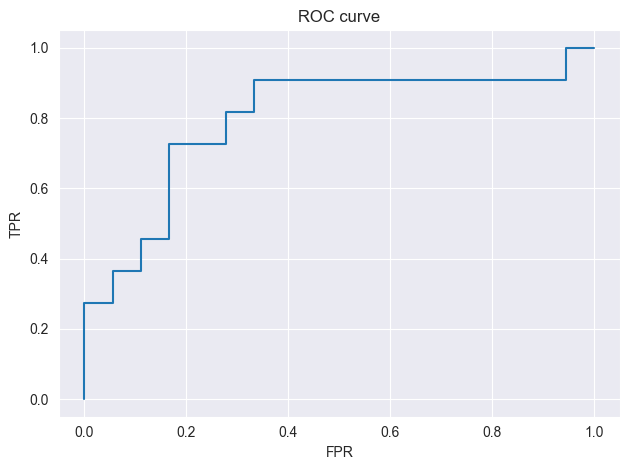

In [27]:
fpr, tpr = roc_curve(y_test.to_numpy(), y_pred_proba)

auc_roc = roc(fpr, tpr)
print(f"AUC-ROC: ", auc_roc)

roc_plot(fpr, tpr)

Можно слелать вывод что модель различает классы лучше случайного классификатора

AUC-PR:  0.6483194415012596


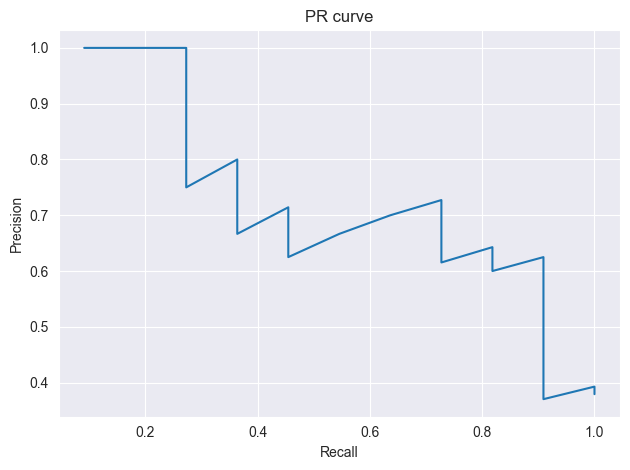

In [28]:
precisions, recalls = pr_curve(y_test.to_numpy(), y_pred_proba)

auc_pr = pr(precisions, recalls)
print(f"AUC-PR: ", auc_pr)

pr_plot(precisions, recalls)

In [29]:
print(np.mean(y_test))

0.3793103448275862


С учётом того что тестовые данные не идельно сбалансированы ($38\%$ `positive`) этот результат также лучше случайного классификатора